In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import Iterator

Using TensorFlow backend.


In [0]:
datagen = ImageDataGenerator()
train_it = datagen.flow_from_directory('/content/drive/My Drive/PINS/', class_mode='categorical', batch_size=256)

Found 10770 images belonging to 100 classes.


In [0]:
type(train_it)

keras_preprocessing.image.directory_iterator.DirectoryIterator

In [0]:
print(train_it[0][0].shape)

(256, 224, 224, 3)


In [0]:
 def rotate(image, angle):
  print(angle)

In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15668923772664244247
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4586375558692370049
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6975154232930373550
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11330115994
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16830255644603486320
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]






['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (5, 5)
nb_classes = 360

nb_train_samples, img_rows, img_cols, img_channels = 256, 256, 256, 3
input_shape = (img_rows, img_cols, img_channels)

# model definition
# input = Input(shape=(img_rows, img_cols, img_channels))
# x = Conv2D(nb_filters, kernel_size[0], kernel_size[1],
#                   activation='relu')(input)
# x = Conv2D(nb_filters, kernel_size[0], kernel_size[1],
#                   activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Dropout(0.25)(x)
# x = Flatten()(x)
# x = Dense(128, activation='relu')(x)
# x = Dropout(0.25)(x)
# x = Dense(nb_classes, activation='softmax')(x)

# model = Model(input=input, output=x)
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential()
model.add(Conv2D(8, kernel_size = 11, strides = (2,2), activation= 'relu', input_shape=input_shape))
model.add(Conv2D(16, kernel_size = 7, strides = (2,2), activation= 'relu'))
model.add(Conv2D(32, kernel_size = 5, strides = (2,2), activation = 'relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size = 5, activation = 'relu'))
model.add(Flatten())
model.add(Dense(360, activation = 'softmax'))


In [0]:
# import keras.backend as K
# def angle_difference(x, y):
#     """
#     Calculate minimum difference between two angles.
#     """
#     return 180 - abs(abs(x - y) - 180)
# def angle_error(y_true, y_pred):
#     """
#     Calculate the mean diference between the true angles
#     and the predicted angles. Each angle is represented
#     as a binary vector.
#     """
#     diff = angle_difference(K.argmax(y_true), K.argmax(y_pred))
#     return K.mean(K.cast(K.abs(diff), K.floatx()))

In [0]:
import keras
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.01))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 123, 123, 8)       2912      
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 59, 59, 16)        6288      
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 28, 28, 32)        12832     
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 24, 24, 64)        51264     
_________________________________________________________________
flatten_12 (Flatten)         (None, 36864)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 360)               13271400  
Total params: 13,344,696
Trainable params: 13,344,696
Non-trainable params: 0
_________________________________________

In [0]:
from utils import angle_error

ModuleNotFoundError: ignored

In [0]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/nweights.h5')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 123, 123, 8)       2912      
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 59, 59, 16)        6288      
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 28, 28, 32)        12832     
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 24, 24, 64)        51264     
_________________________________________________________________
flatten_12 (Flatten)         (None, 36864)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 360)               13271400  
Total params: 13,344,696
Trainable params: 13,344,696
Non-trainable params: 0
_________________________________________

In [0]:
import numpy as np
import imutils
batch_size = 32
nb_epoch = 10
checkpointer = ModelCheckpoint(
    filepath='weights.hdf5',
    save_best_only=True
)
early_stopping = EarlyStopping(patience=3, min_delta = 0.01)
tensorboard = TensorBoard()
for i in range(0,1):
    for j in range(0,10):
        for l in range(0, 10):
            a = np.zeros((256, 360), dtype = np.float)
            k = train_it[j][0]

            for p in range(0, 256):
                b = np.random.randint(360)
                a[p][b] = 1
                k[p] = imutils.rotate(k[p],b)
            model.fit(
            k, a,
            steps_per_epoch= 8,
            epochs= 20,
            verbose=1,
            callbacks=[checkpointer, early_stopping,tensorboard]
            )




Epoch 1/20
8/8 [==============================] - 7s 871ms/step - loss: 1.0566
Epoch 2/20


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:842: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


8/8 [==============================] - 3s 350ms/step - loss: 0.2614
Epoch 3/20
8/8 [==============================] - 3s 349ms/step - loss: 0.2568
Epoch 4/20
8/8 [==============================] - 3s 349ms/step - loss: 0.2552
Epoch 5/20
8/8 [==============================] - 3s 351ms/step - loss: 0.2543
Epoch 6/20
8/8 [==============================] - 3s 350ms/step - loss: 0.2538
Epoch 7/20
8/8 [==============================] - 3s 348ms/step - loss: 0.2535
Epoch 8/20
8/8 [==============================] - 3s 351ms/step - loss: 0.2532
Epoch 9/20
8/8 [==============================] - 3s 352ms/step - loss: 0.2531
Epoch 10/20
8/8 [==============================] - 3s 353ms/step - loss: 0.2529
Epoch 11/20
8/8 [==============================] - 3s 351ms/step - loss: 0.2528
Epoch 12/20
8/8 [==============================] - 3s 349ms/step - loss: 0.2527
Epoch 13/20
8/8 [==============================] - 3s 353ms/step - loss: 0.2526
Epoch 14/20
8/8 [==============================] - 3s 349ms

In [0]:
model.save('nweights.h5')

In [0]:
import cv2
import numpy as np
l = cv2.imread('/content/save.jpg')
l.shape

AttributeError: ignored

In [0]:
l = cv2.resize(l,(256,256))

In [0]:
l.shape

(256, 256, 3)

In [0]:
l = np.reshape(l, (1, 256, 256, 3))

In [0]:
l.shape

(1, 256, 256, 3)

In [0]:
v = model.predict(l)

In [0]:
v.shape

(1, 360)

In [0]:
import numpy as np
import imutils
a = np.zeros((256, 360), dtype = np.float)
k = train_it[12][0]
        
for p in range(0, 256):
    b = np.random.randint(360)
    a[p][b] = 1
    k[p] = imutils.rotate(k[p],b)

In [0]:
v = model.predict(k)

In [0]:
print(np.argmax(v[56]))
print(np.argmax(a[56]))

241
241


In [0]:
j = 0
for i in range(0, 256):
    print(np.argmax(v[i]), np.argmax(a[i]))
    if(abs(np.argmax(v[i])-np.argmax(a[i])) > 10):
        j = j + 1
print(j)

23 18
39 40
21 18
312 313
70 67
117 116
101 99
257 259
295 293
24 20
12 12
111 110
84 74
142 143
84 80
9 4
174 172
303 302
282 282
187 192
186 190
49 50
320 321
219 221
133 132
324 319
347 347
337 337
115 115
159 156
275 273
276 275
246 251
123 133
111 111
143 142
104 105
54 53
33 34
263 265
246 247
7 7
300 299
271 271
129 138
114 117
211 212
201 204
332 330
65 58
116 116
129 127
319 319
256 256
32 33
320 318
241 241
0 0
95 97
140 140
321 316
357 356
88 83
174 172
355 353
105 105
139 139
69 79
75 78
338 338
157 156
256 256
104 105
121 119
36 36
6 5
7 7
260 260
273 272
323 323
36 35
266 264
258 261
157 157
343 342
291 290
6 5
168 168
49 44
189 116
88 81
312 315
198 178
123 207
273 268
80 77
221 220
353 354
20 26
265 64
28 27
95 97
337 338
75 73
332 331
286 286
107 110
15 13
290 289
314 314
134 133
143 143
23 20
341 340
186 185
209 211
215 213
18 19
319 320
233 233
235 236
118 121
221 220
296 294
290 291
129 128
246 245
46 47
332 332
257 256
84 236
303 300
121 121
153 153
322 303
350 354

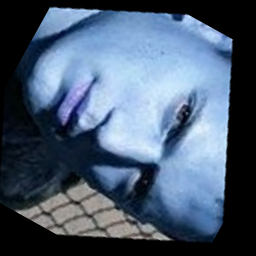

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(k[56])


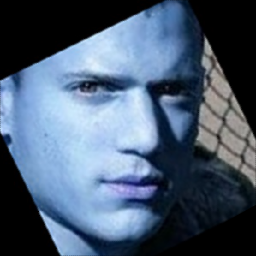

In [0]:
h = imutils.rotate(k[56], -241)
cv2_imshow(h)

In [0]:
one = datagen.flow_from_directory('/content/p', class_mode='categorical', batch_size=1)

Found 2 images belonging to 2 classes.


In [0]:
import keras
model = keras.models.load_model('nweights.h5')







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
